In [6]:
# import libraraies
import re
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
from datagovindia import DataGovIndia

# Initialize with your API key (replace YOUR_API_KEY with your actual key)
api_key = "apikey here"
datagov = DataGovIndia(api_key=api_key)

In [8]:
# lets import the meta data of IMD
imddata = datagov.search("India Meteorological Department (IMD)")

In [9]:
imddata.shape

(2935, 10)

In [10]:
# lets understand the imddata 
imddata

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
0,14cc3033-3596-4a65-8f5f-bae5115a2428,Station-wise Dust Storm Events Observed as Rep...,Station-wise Dust Storm Events Observed as Rep...,Central,"[document_id, _sl__no_, station_name, _2020, _...",[Rajya Sabha],data.gov.in,[All],2024-04-14T14:46:51+00:00,2024-04-15T11:09:38+00:00
1,29734c42-3123-47df-a472-cfed98b1f34d,Daily Sub-basin-wise Rainfall data from India ...,Daily Sub-basin-wise Rainfall data from India ...,Central,"[document_id, _basin_, subbasin, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2023-12-14T08:55:46+00:00,2023-12-15T09:45:48+00:00
2,84f7de24-d561-431f-ab5c-8457aadcf0b5,Daily Rainfall data from India Meteorological ...,Daily Rainfall data from India Meteorological ...,Central,"[document_id, _state_, district, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2023-12-14T08:56:02+00:00,2023-12-15T09:45:48+00:00
3,cfe63985-aa0c-4f67-9db2-8ce9286a136b,Daily Rainfall data from India Meteorological ...,Daily Rainfall data from India Meteorological ...,Central,"[document_id, _state_, district, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2023-12-14T08:54:01+00:00,2023-12-15T09:45:46+00:00
4,b7908c59-289a-4f25-8174-a7ddbc685050,Daily Rainfall data from India Meteorological ...,Daily Rainfall data from India Meteorological ...,Central,"[document_id, _state_, district, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2023-12-14T08:51:51+00:00,2023-12-15T09:45:45+00:00
...,...,...,...,...,...,...,...,...,...,...
2930,9946784f-ac85-49b6-92d1-c586b03a7393,Daily Sub-basin-wise Rainfall data from India ...,Daily Sub-basin-wise Rainfall data from India ...,Central,"[document_id, _basin_, subbasin, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2022-10-28T05:58:07+00:00,2022-10-31T10:56:10+00:00
2931,52e10fef-6bfc-4437-ad13-23217515186e,Daily Rainfall data from India Meteorological ...,Daily Rainfall data from India Meteorological ...,Central,"[document_id, _state_, district, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2022-10-28T05:58:19+00:00,2022-10-31T10:56:10+00:00
2932,9951cb31-7046-4f77-a2ad-3eb7ad094885,Daily Rainfall data from India Meteorological ...,Daily Rainfall data from India Meteorological ...,Central,"[document_id, _state_, district, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2022-10-28T05:56:16+00:00,2022-10-31T10:56:08+00:00
2933,aeca8211-98ad-4d5e-9979-b72efd6726de,Daily Sub-basin-wise Rainfall data from India ...,Daily Sub-basin-wise Rainfall data from India ...,Central,"[document_id, _basin_, subbasin, date, year, m...","[Department of Water Resources, River Developm...",data.gov.in,[Water Resources],2022-10-28T05:56:11+00:00,2022-10-31T10:56:07+00:00


In [14]:
# we only required three columns for our project
imddata = imddata[["resource_id","title","fields"]]

In [15]:
imddata.isna().sum()

resource_id    0
title          0
fields         0
dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)
imddata

,resource_id,title,fields
0,14cc3033-3596-4a65-8f5f-bae5115a2428,Station-wise Dust Storm Events Observed as Reported by India Meteorological Department (IMD) from 2020 to 2022,"[document_id, _sl__no_, station_name, _2020, _2021, _2022, resource_uuid]"
1,29734c42-3123-47df-a472-cfed98b1f34d,Daily Sub-basin-wise Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during January 2023,"[document_id, _basin_, subbasin, date, year, month, avg_rainfall, agency_name, resource_uuid]"
2,84f7de24-d561-431f-ab5c-8457aadcf0b5,Daily Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during January 2023,"[document_id, _state_, district, date, year, month, avg_rainfall, agency_name, resource_uuid]"
3,cfe63985-aa0c-4f67-9db2-8ce9286a136b,Daily Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during February 2023,"[document_id, _state_, district, date, year, month, avg_rainfall, agency_name, resource_uuid]"
4,b7908c59-289a-4f25-8174-a7ddbc685050,Daily Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during March 2023,"[document_id, _state_, district, date, year, month, avg_rainfall, agency_name, resource_uuid]"
...,...,...,...
2930,9946784f-ac85-49b6-92d1-c586b03a7393,Daily Sub-basin-wise Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during December 1946,"[document_id, _basin_, subbasin, date, year, month, avg_rainfall, agency_name, resource_uuid]"
2931,52e10fef-6bfc-4437-ad13-23217515186e,Daily Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during December 1946,"[document_id, _state_, district, date, year, month, avg_rainfall, agency_name, resource_uuid]"
2932,9951cb31-7046-4f77-a2ad-3eb7ad094885,Daily Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during October 2022,"[document_id, _state_, district, date, year, month, avg_rainfall, agency_name, resource_uuid]"
2933,aeca8211-98ad-4d5e-9979-b72efd6726de,Daily Sub-basin-wise Rainfall data from India Meteorological Department (IMD GRID MODEL) Agency during October 2022,"[document_id, _basin_, subbasin, date, year, month, avg_rainfall, agency_name, resource_uuid]"


In [16]:
# lets do feature eng. and create some important feature for helping us to filter dataset by user's query
def extract_enhanced_features(title):
    """Extract granularity, months, years, region, category, and duration type from title"""
    
    text = str(title).lower()
    
    # 1. Time Granularity
    granularity_patterns = {
        'daily': r'\bdaily\b',
        'monthly': r'\bmonth-wise\b|\bmonthly\b',
        'yearly': r'\b(yearly|year-wise|annual|annually)\b',
        'weekly': r'\bweekly\b|\bweek-wise\b',
        'hourly': r'\bhourly\b',
        'quarterly': r'\bquarterly\b|\bquarter-wise\b'
    }
    granularity = None
    for key, pattern in granularity_patterns.items():
        if re.search(pattern, text):
            granularity = key
            break

    # 2. Month Extraction
    month_names = [
        'january', 'february', 'march', 'april', 'may', 'june',
        'july', 'august', 'september', 'october', 'november', 'december'
    ]
    months_found = [month for month in month_names if re.search(r'\b' + month + r'\b', text)]
    
    # 3. Year Extraction
    years = []
    # Single years - full 4-digit
    years.extend([int(y) for y in re.findall(r'\b(19\d{2}|20\d{2})\b', text)])
    # from YYYY to YYYY or YYYY to YYYY
    for match in re.findall(r'(?:from\s+)?(\d{4})\s+to\s+(\d{4})', text):
        years.extend([int(match[0]), int(match[1])])
    # YYYY-YYYY
    for match in re.findall(r'(\d{4})\s*-\s*(\d{4})', text):
        years.extend([int(match[0]), int(match[1])])
    # YYYY-YY (e.g. 2019-20)
    for match in re.findall(r'(\d{4})\s*-\s*(\d{2})\b', text):
        start_year = int(match[0])
        end_year = int(str(start_year)[:2] + match[1])
        years.extend([start_year, end_year])
    years = sorted(set(years))
    
    start_year = min(years) if years else None
    end_year = max(years) if years else None
    year_span = (end_year - start_year + 1) if (start_year and end_year) else None
    
    # 4. Duration Type Classification
    duration_type = None
    if months_found and start_year and end_year and start_year == end_year:
        duration_type = 'specific_month'
    elif start_year and end_year:
        if start_year == end_year:
            duration_type = 'specific_year'
        else:
            duration_type = 'duration_range'
    else:
        duration_type = 'unknown'
    
    # 5. Region Extraction
    region_patterns = {
        'sub-basin': r'sub-basin',
        'station-wise': r'station-wise',
        'state-wise': r'state-wise',
        'district-wise': r'district-wise',
        'zone-wise': r'zone-wise|zonal',
        'national': r'\bnational\b|\ball india\b',
        'regional': r'\bregional\b'
    }
    region = None
    for key, pattern in region_patterns.items():
        if re.search(pattern, text):
            region = key
            break
    
    # 6. Category Classification
    categories = {
        'rainfall': ['rainfall', 'rain', 'precipitation', 'monsoon'],
        'cyclone_storm': ['cyclone', 'cyclonic', 'storm', 'tropical storm', 'depression'],
        'temperature': ['temperature', 'heat', 'cold', 'thermal'],
        'dust_storm': ['dust storm', 'dust', 'sandstorm'],
        'flood': ['flood', 'flooding', 'inundation'],
        'drought': ['drought', 'dry spell', 'water scarcity'],
        'crop_production': ['crop', 'production', 'yield', 'harvest', 'cultivation'],
        'irrigation': ['irrigation', 'water supply', 'drip', 'sprinkler'],
        'soil': ['soil', 'land', 'fertility'],
        'budget_finance': ['budget', 'allocation', 'fund', 'expenditure', 'financial'],
        'weather_general': ['weather', 'meteorological', 'climate', 'atmospheric']
    }
    category_scores = {}
    for category, keywords in categories.items():
        score = sum(1 for keyword in keywords if keyword in text)
        if score > 0:
            category_scores[category] = score
    primary_category = max(category_scores, key=category_scores.get) if category_scores else 'general'
    
    # 7. Return the features as dict
    return {
        'granularity': granularity,
        'months': months_found if months_found else None,
        'years': years if years else None,
        'start_year': start_year,
        'end_year': end_year,
        'year_span': year_span,
        'duration_type': duration_type,
        'region': region,
        'category': primary_category
    }


def add_extracted_features_to_df(df, text_column='title'):
    """
    Extract features for all rows in DataFrame and concatenate as columns
    """
    features_series = df[text_column].fillna('').apply(extract_enhanced_features)
    features_df = pd.json_normalize(features_series)
    return pd.concat([df.reset_index(drop=True), features_df], axis=1)




In [ ]:


pd.reset_option('display.max_colwidth')


In [17]:
# Example usage:
# imddata is your DataFrame with column 'title'
finalimd = add_extracted_features_to_df(imddata, text_column='title')
print(finalimd.sample(10))


                               resource_id  \
2310  8c6d962c-c18c-4936-8256-3591afc22706   
124   8073f758-f74f-4932-90a8-916a76f103d5   
834   3c792b0e-5099-4764-bbbb-909673c8b639   
265   6cedba63-2988-49ed-8241-adf4f529a09f   
394   32bb23f0-5aa5-40b4-9f3d-6d0b0de5e1ef   
2357  1627c349-9f3a-4f65-b2b3-69f2e05e898d   
2039  e42d53bf-3b00-4c00-8969-f32ca8d05194   
270   f02905d0-ab71-4a60-85e2-8ffef54a6300   
358   7f8c09b5-0eb7-4bbe-9e4d-ff7a69bde991   
1961  5d36721c-f3e6-4b0f-a514-3e54a99e9c9b   

                                                  title  \
2310  Daily Sub-basin-wise Rainfall data from India ...   
124   Daily Sub-basin-wise Rainfall data from India ...   
834   Daily Sub-basin-wise Rainfall data from India ...   
265   Daily Rainfall data from India Meteorological ...   
394   Daily Sub-basin-wise Rainfall data from India ...   
2357  Daily Rainfall data from India Meteorological ...   
2039  Daily Rainfall data from India Meteorological ...   
270   Daily Sub-basin

In [20]:
# lets undersatnd the dataset
finalimd.category.value_counts()

category
rainfall           2932
dust_storm            1
cyclone_storm         1
weather_general       1
Name: count, dtype: int64

In [21]:
finalimd.region.value_counts()

region
sub-basin       1466
station-wise       1
Name: count, dtype: int64

In [22]:
finalimd.years.value_counts().sort_values(ascending=False)

years
[1951]          24
[2018]          24
[1931]          24
[2021]          24
[1904]          24
                ..
[1901]          22
[2022]          17
[2023]          14
[2017, 2021]     1
[2020, 2022]     1
Name: count, Length: 125, dtype: int64

In [32]:
finalimd.to_csv("imd_eng_feature_df.csv",index = False)

2025-10-25 11:26:19,762 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-25 11:26:19,773 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


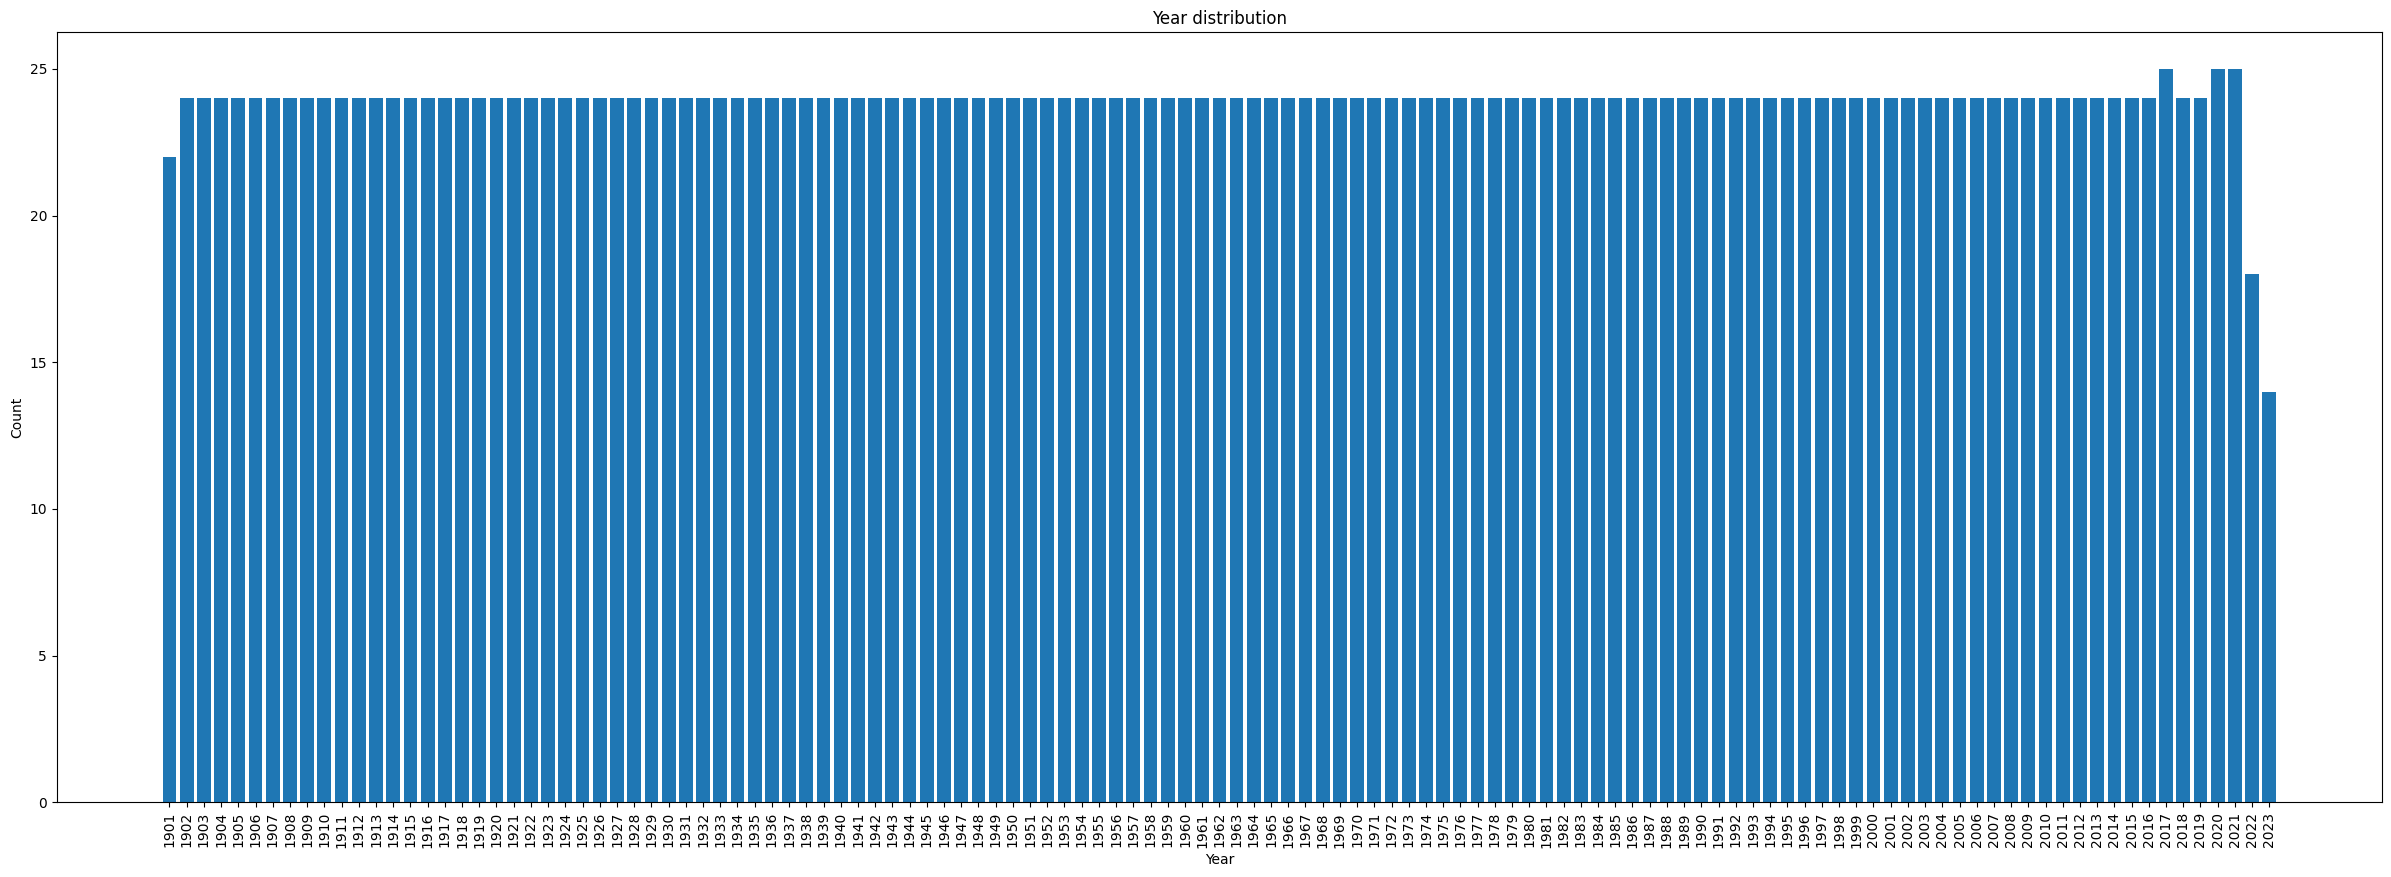

In [20]:
# Explode years lists to separate rows
df_exploded = finalimd.explode('years')

# Now count values and plot
year_counts = df_exploded['years'].value_counts().sort_index()
plt.figure(figsize=(30,10))
plt.bar(year_counts.index.astype(str), year_counts.values)
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year distribution')
plt.show()


## handling the metadata of Ministry of Agriculture & Farmers Welfare  

In [24]:
data = datagov.search('Ministry of Agriculture & Farmers Welfare')


In [25]:
data

,resource_id,title,description,org_type,fields,orgs,source,sectors,date_created,date_updated
0,7a310b42-f6b5-4da0-a293-8c54f5e31ac5,Year-wise Details of Budget Allocation for Min...,Year-wise Details of Budget Allocation for Min...,Central,"[document_id, _year, budget_allocation_of_mini...",[Rajya Sabha],data.gov.in,[All],2025-08-10T19:45:46+00:00,2025-08-10T19:45:46+00:00
1,6f7a3544-127e-4b73-8c9c-90dc5ca7ec80,State-wise Details of Financial Support Provid...,State-wise Details of Financial Support Provid...,Central,"[document_id, _sl_no, state, kvk, financial_su...",[Rajya Sabha],data.gov.in,[All],2023-12-03T15:21:30+00:00,2023-12-05T10:33:42+00:00
2,0b999592-9b69-4e4b-a300-6814f2844774,"State-wise Allocation made, Funds Released & U...","State-wise Allocation made, Funds Released & U...",Central,"[document_id, state__ut_name, _2014_15___alloc...",[Rajya Sabha],data.gov.in,[All],2023-12-03T13:45:24+00:00,2023-12-05T10:19:34+00:00
3,1f208255-56e5-4f4e-9b5d-7b6b3f05c99c,State/UT wise Fund Released under Mahila Kisan...,State/UT wise Fund Released under Mahila Kisan...,Central,"[document_id, sl__no_, state_ut, release__2017...",[Rajya Sabha],data.gov.in,[All],2023-11-20T17:31:47+00:00,2023-11-21T09:51:23+00:00
4,21a7b4ac-8fb1-4367-9880-970275428efd,Production estimates of major agricultural cro...,Production estimates of major agricultural cro...,Central,"[document_id, crop, season, __2013_14, average...",[Rajya Sabha],data.gov.in,[All],2023-10-21T21:18:41+00:00,2023-10-23T16:19:01+00:00
...,...,...,...,...,...,...,...,...,...,...
92,a5ab4475-7f76-4b53-9470-5471fbfa2d64,"State-wise number of soil samples collected, t...","State-wise number of soil samples collected, t...",Central,"[document_id, sl_no_, _zone, state, target_no_...",[Rajya Sabha],data.gov.in,[All],2017-08-28T04:52:59+00:00,2018-11-30T00:54:09+00:00
93,9325cd20-660e-4963-ac7a-489b631a6a7c,Sector wise FDI inflows in agriculture from 20...,Sector wise FDI inflows in agriculture from 20...,Central,"[document_id, sl_no, sector, __2013_14, __2014...",[Rajya Sabha],data.gov.in,[All],2017-07-04T14:07:12+00:00,2018-11-29T23:48:02+00:00
94,442c7366-44ed-4bb2-872c-9779b19c655c,State-wise number of Soil Health Cards issued ...,State-wise number of Soil Health Cards issued ...,Central,"[document_id, sr_no_, _zone, state, no_of_soil...",[Rajya Sabha],data.gov.in,[All],2017-07-13T09:25:08+00:00,2018-11-29T23:28:44+00:00
95,18dedb26-1d95-4751-a78f-87675e833bef,Total FDI inflows in agriculture sector from 2...,Total FDI inflows in agriculture sector from 2...,Central,"[document_id, sl_no_, year_apr_mar_, fdi_inflo...",[Rajya Sabha],data.gov.in,[All],2017-07-04T08:35:18+00:00,2018-11-29T23:28:04+00:00


In [26]:
df = data[["resource_id","title","fields"]]

In [27]:
df

,resource_id,title,fields
0,7a310b42-f6b5-4da0-a293-8c54f5e31ac5,Year-wise Details of Budget Allocation for Min...,"[document_id, _year, budget_allocation_of_mini..."
1,6f7a3544-127e-4b73-8c9c-90dc5ca7ec80,State-wise Details of Financial Support Provid...,"[document_id, _sl_no, state, kvk, financial_su..."
2,0b999592-9b69-4e4b-a300-6814f2844774,"State-wise Allocation made, Funds Released & U...","[document_id, state__ut_name, _2014_15___alloc..."
3,1f208255-56e5-4f4e-9b5d-7b6b3f05c99c,State/UT wise Fund Released under Mahila Kisan...,"[document_id, sl__no_, state_ut, release__2017..."
4,21a7b4ac-8fb1-4367-9880-970275428efd,Production estimates of major agricultural cro...,"[document_id, crop, season, __2013_14, average..."
...,...,...,...
92,a5ab4475-7f76-4b53-9470-5471fbfa2d64,"State-wise number of soil samples collected, t...","[document_id, sl_no_, _zone, state, target_no_..."
93,9325cd20-660e-4963-ac7a-489b631a6a7c,Sector wise FDI inflows in agriculture from 20...,"[document_id, sl_no, sector, __2013_14, __2014..."
94,442c7366-44ed-4bb2-872c-9779b19c655c,State-wise number of Soil Health Cards issued ...,"[document_id, sr_no_, _zone, state, no_of_soil..."
95,18dedb26-1d95-4751-a78f-87675e833bef,Total FDI inflows in agriculture sector from 2...,"[document_id, sl_no_, year_apr_mar_, fdi_inflo..."


In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
df["title"].sample(10)

3        State/UT wise Fund Released under Mahila Kisan Sashaktikaran Pariyojana (MKSP) of Ministry of Rural Development from 2017-18 to 2019-20 (From: Ministry of Agriculture & Farmers Welfare)
35                      Mission Organic Value Chain Development for North Eastern Region (MOVCDNER) (in reply to unstarred question on 18-11-2016)(From:Ministry of Agriculture & Farmers Welfare)
18    Average monthly income and average amount of outstanding loan per agricultural household during the agricultural year July 2012 to June 2013(From:Ministry of Agriculture & Farmers Welfare)
94                                                       State-wise number of Soil Health Cards issued during 2015-16 to 2016-17 as on 15.11.2016 (From:Ministry of Agriculture & Farmers Welfare)
32                                                                       Minimum support prices for agricultural produce during 2012-13 to 2016-17(From:Ministry of Agriculture & Farmers Welfare)
56                       

In [30]:
import openai
print(openai.__version__)


1.42.0


In [ ]:
# lets do feature eng. smartly using gpt
from openai import OpenAI

# Initialize OpenAI client
client = OpenAI(api_key="apikey here")
def extract_features_with_openai(title):
    """Extract comprehensive features from dataset title using OpenAI GPT-4"""
    
    prompt = f"""
You are a metadata extraction expert for government datasets. Extract the following information from the dataset title below.


Extract these features:
1. **start_year**: First year mentioned (4-digit integer)
2. **end_year**: Last year mentioned (4-digit integer)
3. **years_list**: Complete list of all individual years covered (as array of integers)
4. **duration_type**: One of: "specific_month", "specific_year", "duration_range", "unknown"
5. **months**: List of months mentioned (e.g., ["january", "march"]) or null
6. **granularity**: One of: "daily", "monthly", "yearly", "quarterly", "weekly", "hourly", or null
7. **region_type**: One of: "state-wise", "district-wise", "national", "zone-wise", "sub-basin", "station-wise", "regional", or null
8. **states_mentioned**: List of Indian state names if explicitly mentioned, or null
9. **category**: Primary topic category - choose the MOST relevant one from:
   - "rainfall"
   - "cyclone_storm"
   - "temperature"
   - "drought"
   - "crop_production"
   - "soil_health"
   - "irrigation"
   - "budget_finance"
   - "loan_credit"
   - "policy_scheme"
   - "fdi_investment"
   - "procurement"
   - "support_price"
   - "export_import"
   - "organic_farming"
   - "training_education"
   - "veterinary"
   - "fisheries"
   - "livestock"
   - "agricultural_income"
   - "land_use"
   - "seeds"
   - "pesticides"
   - "general"
10. **sub_category**: Secondary relevant topic if applicable, or null


Dataset Title:
\"\"\"{title}\"\"\"


Return ONLY a valid JSON object with exactly these keys. No explanation, no markdown formatting.


{{
  "start_year": int or null,
  "end_year": int or null,
  "years_list": [int, ...] or null,
  "duration_type": string,
  "months": [string, ...] or null,
  "granularity": string or null,
  "region_type": string or null,
  "states_mentioned": [string, ...] or null,
  "category": string,
  "sub_category": string or null
}}
"""


    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": "You are a precise metadata extraction assistant. Always return valid JSON only."},
                {"role": "user", "content": prompt}
            ],
            temperature=0,
            max_tokens=500
        )
        
        
        response_text = response.choices[0].message.content.strip()
        
        # Remove markdown code fences if present
        if response_text.startswith("```"):
            response_text = response_text.split("```")[1]
            if response_text.startswith("json"):
                response_text = response_text[4:]
            response_text = response_text.strip()
        
        
        # Parse JSON
        features = json.loads(response_text)
        
        return features
        
    except json.JSONDecodeError as e:
        print(f"JSON parsing error for title: {title}")
        print(f"Response was: {response_text}")
        return get_default_features()
    except Exception as e:
        print(f"Error processing title: {title}")
        print(f"Error: {str(e)}")
        return get_default_features()



def get_default_features():
    """Return default empty features structure"""
    return {
        "start_year": None,
        "end_year": None,
        "years_list": None,
        "duration_type": "unknown",
        "months": None,
        "granularity": None,
        "region_type": None,
        "states_mentioned": None,
        "category": "general",
        "sub_category": None
    }



def batch_extract_features(df, text_column='title', batch_size=10, sleep_time=1):
    """
    Extract features from all titles in dataframe using OpenAI API
    
    Parameters:
    - df: DataFrame with dataset titles
    - text_column: Name of column containing titles
    - batch_size: Process in batches (for progress tracking)
    - sleep_time: Seconds to wait between API calls (rate limiting)
    """
    
    results = []
    total = len(df)
    
    print(f"Processing {total} titles...")
    
    for idx, row in df.iterrows():
        title = str(row[text_column])
        
        # Progress indicator
        if (idx + 1) % batch_size == 0:
            print(f"Processed {idx + 1}/{total} titles...")
        
        # Extract features
        features = extract_features_with_openai(title)
        features['original_title'] = title
        features['original_index'] = idx
        
        results.append(features)
        
        # Rate limiting
        time.sleep(sleep_time)
    
    print(f"Completed! Processed {total} titles.")
    
    # Create features dataframe
    features_df = pd.DataFrame(results)
    
    # Combine with original dataframe
    result_df = pd.concat([
        df.reset_index(drop=True),
        features_df.drop(['original_title', 'original_index'], axis=1)
    ], axis=1)
    
    return result_df






In [ ]:
enhanced_df = batch_extract_features(
    df, 
    text_column='title',
    batch_size=10,
    sleep_time=1  # Adjust based on your API rate limits
)



Processing 97 titles...


2025-10-25 11:26:53,470 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:26:59,877 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:06,463 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:12,845 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:18,056 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:21,669 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:25,777 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:31,108 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:34,558 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 10/97 titles...


2025-10-25 11:27:38,785 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:43,809 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:47,544 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:51,034 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:54,647 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:27:58,083 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:01,741 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:05,085 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:09,062 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 20/97 titles...


2025-10-25 11:28:18,932 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:24,474 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:29,213 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:34,276 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:38,807 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:43,354 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:47,307 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:51,165 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:28:55,060 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 30/97 titles...


2025-10-25 11:29:04,651 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:08,483 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:12,854 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:17,044 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:21,159 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:25,593 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:29,953 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:33,702 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:38,419 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 40/97 titles...


2025-10-25 11:29:45,653 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:49,246 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:53,064 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:29:56,731 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:00,630 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:05,981 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:12,598 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:17,089 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:22,890 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 50/97 titles...


2025-10-25 11:30:32,523 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:37,021 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:41,059 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:45,383 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:49,334 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:53,227 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:30:57,482 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:02,382 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:07,319 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 60/97 titles...


2025-10-25 11:31:16,182 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:19,799 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:23,843 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:28,475 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:33,057 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:37,972 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:42,774 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:47,055 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:31:51,229 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 70/97 titles...


2025-10-25 11:31:59,309 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:03,370 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:06,918 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:10,284 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:14,848 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:19,130 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:23,469 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:27,389 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:30,913 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 80/97 titles...


2025-10-25 11:32:39,599 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:43,229 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:48,879 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:52,773 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:32:57,156 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:01,821 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:07,309 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:11,079 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:15,818 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "

Processed 90/97 titles...


2025-10-25 11:33:25,379 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:30,379 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:35,769 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:39,929 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:45,530 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:50,319 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:33:56,159 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-10-25 11:34:00,879 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Completed! Processed 97 titles.


In [48]:
# Save results
# enhanced_df.to_csv('Agr_eng_feature_dfi.csv', index=False)

enhanced_df = pd.read_csv("Agr_eng_feature_dfi.csv")

# Display sample results
print(enhanced_df[['title', 'start_year', 'end_year', 'years_list', 'category', 'region_type', 'granularity']].head(20))



                                                                                                                                                                                                                                                         title  \
0                                                                           Year-wise Details of Budget Allocation for Ministry of Agriculture & Farmers Welfare and Department of Agricultural Research and Education (DARE) Detailed from 2020-21 to 2024-25   
1                                                      State-wise Details of Financial Support Provided to KVKs from the State of Uttar Pradesh, West Bengal and Punjab Under RKVY during 2016-17 to 2017-18 (From: Ministry of Agriculture & Farmers Welfare)   
2   State-wise Allocation made, Funds Released & Utilized under Mission for Integrated Development of Horticulture - Horticulture Mission for North East & Himalayan States (HMENH) during 2014-15 & 2015-16 (From: Ministry of Ag

In [39]:
# Check category distribution
print("\nCategory Distribution:")
print(enhanced_df['category'].value_counts())

# Check region distribution
print("\nRegion Type Distribution:")
print(enhanced_df['region_type'].value_counts())



Category Distribution:
category
budget_finance         16
crop_production        16
policy_scheme           7
seeds                   6
loan_credit             5
general                 5
support_price           5
organic_farming         5
soil_health             4
pesticides              4
drought                 3
fisheries               3
training_education      3
veterinary              2
agricultural_income     2
land_use                2
fdi_investment          2
export_import           2
livestock               2
procurement             1
import_export           1
irrigation              1
Name: count, dtype: int64

Region Type Distribution:
region_type
state-wise       53
national         21
regional          1
district-wise     1
Name: count, dtype: int64


In [40]:
enhanced_df.columns

Index(['resource_id', 'title', 'fields', 'start_year', 'end_year',
       'years_list', 'duration_type', 'months', 'granularity', 'region_type',
       'states_mentioned', 'category', 'sub_category'],
      dtype='object')

In [42]:
print(f" columns present in imd{finalimd.columns}")
print(f" columns present in agricultuer{enhanced_df.columns}")


 columns present in imdIndex(['resource_id', 'title', 'fields', 'granularity', 'months', 'years',
       'start_year', 'end_year', 'year_span', 'duration_type', 'region',
       'category'],
      dtype='object')
 columns present in agricultuerIndex(['resource_id', 'title', 'fields', 'start_year', 'end_year',
       'years_list', 'duration_type', 'months', 'granularity', 'region_type',
       'states_mentioned', 'category', 'sub_category'],
      dtype='object')
